In [1]:
import wrangle as w
import explore as e

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
train, validate, test = w.split_data()

In [3]:
train.head()

,repo,language,original,clean,stemmed,lemmatized
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenter h2videoretalking br span style...,div aligncent h2videoretalk br span stylefonts...,div aligncent h2videoretalk br span stylefonts...
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheats fpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheat fpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheat fpsdemo1httpsuserimagesgith...
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1 ...,h1 aligncenterth futur cloud data analyticsh1 ...


In [4]:
python = train[train.language == 'Python']
java = train[train.language == 'JavaScript']
rust = train[train.language == 'Rust']

In [5]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
python_words = clean(' '.join(python['lemmatized']))
java_words = clean(' '.join(java['lemmatized']))
rust_words = clean(' '.join(rust['lemmatized']))
all_words = clean(' '.join(train['lemmatized']))

In [7]:
len(python_words), len(java_words), len(rust_words), len(all_words)

(40611, 85290, 40328, 166229)

In [8]:
len(python_words) + len(java_words) + len(rust_words) == len(all_words)

True

In [9]:
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [10]:
all_freqs = pd.concat([python_freq, java_freq, rust_freq, all_freq], 
                      axis=1).fillna(0).astype(int)
all_freqs.columns =['python', 'java', 'rust', 'all']

In [11]:
all_freqs

,python,java,rust,all
close,564,11,9,584
use,544,1080,527,2151
intern,537,28,8,573
engin,511,142,57,710
softwar,481,19,20,520
...,...,...,...,...
start61quickstart,0,0,1,1
endpointsfunctionsourcetilejson,0,0,1,1
guide6developmentguid,0,0,1,1
interface5configurationfil,0,0,1,1


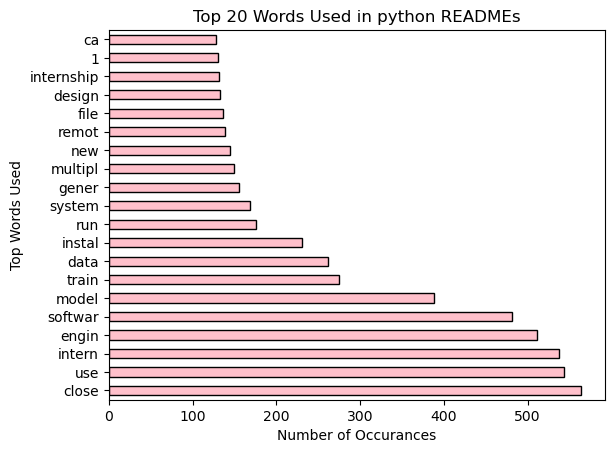

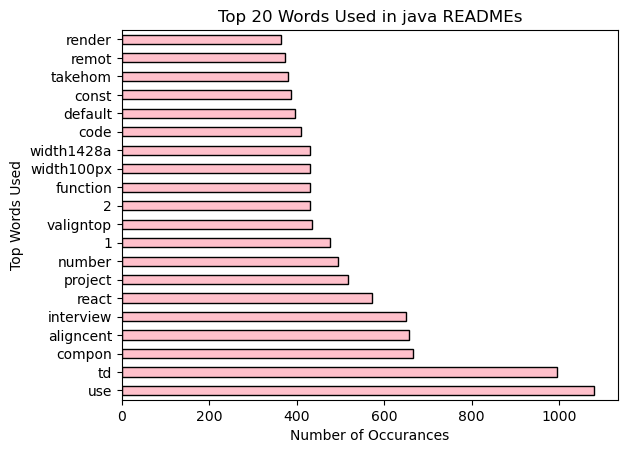

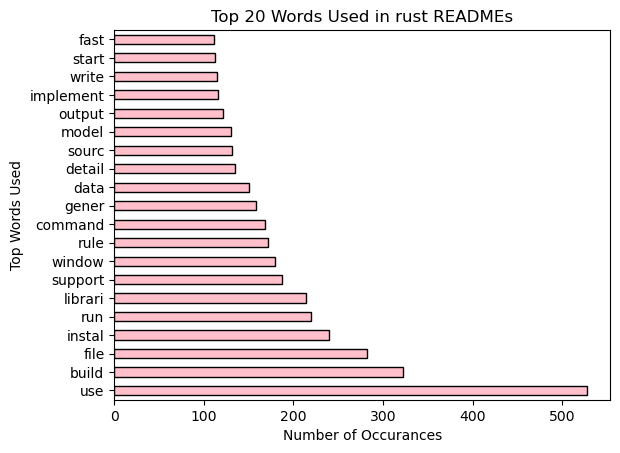

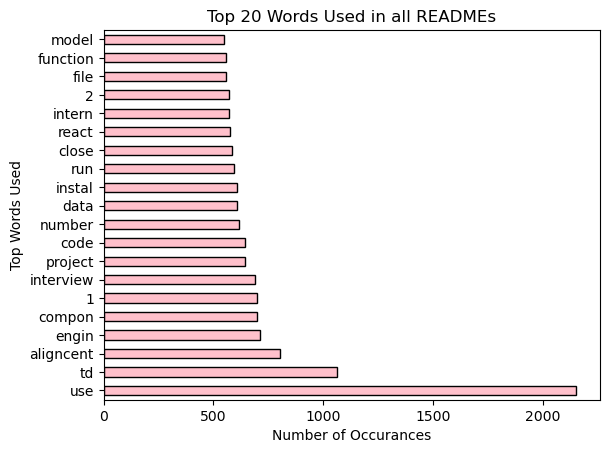

In [12]:
for col in all_freqs.columns:
    all_freqs[col].sort_values(ascending=False).head(20).plot.barh(ec='black', color='pink')
    plt.title(f'Top 20 Words Used in {col} READMEs')
    plt.xlabel('Number of Occurances')
    plt.ylabel('Top Words Used')
    plt.show()

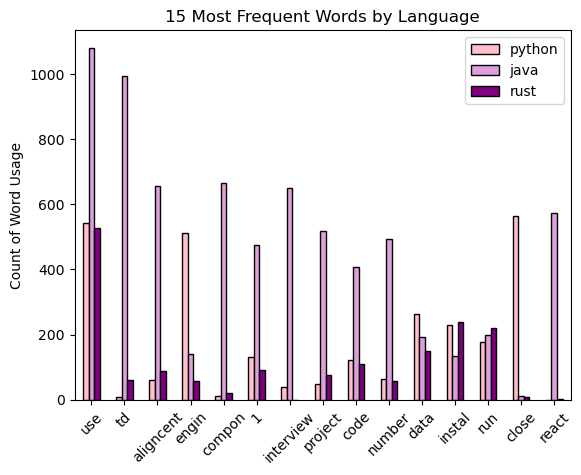

In [13]:
# Visualization of 15 Most Frequently Occurring Words
colors = ['pink', 'plum', 'purple']
all_freqs.sort_values('all', ascending=False)[['python', 'java', 'rust']].head(15).plot.bar(ec='black', color=colors).set(title='15 Most Frequent Words by Language')
plt.ylabel('Count of Word Usage')
plt.xticks(rotation=45)
plt.show()

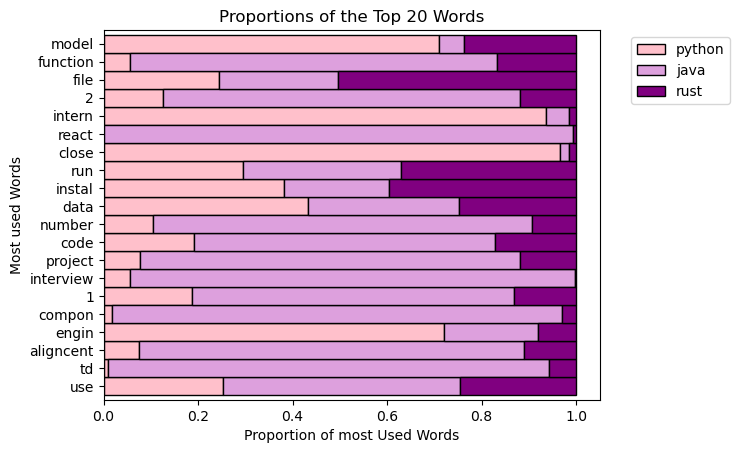

In [14]:
# Visualization of Top 20 Frequently Used Words - Proportionally Calculated

colors = ['pink', 'plum', 'purple']
all_freqs.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['python', 'java', 'rust']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1, color=colors).set(title='Proportions of the Top 20 Words')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Proportion of most Used Words')
plt.ylabel('Most used Words')
plt.show()

**Takeaway:** Most of the top used words do have even use by all three languages; it seems each word is used heavily by just one word. The excepts to this concept may include the words: "file", "run", "install", "data", "use".

#### Bigrams

In [15]:
# To remove all words which are actaully numbers, I'll run this function

language_words_only = e.get_only_alphabetical_words()

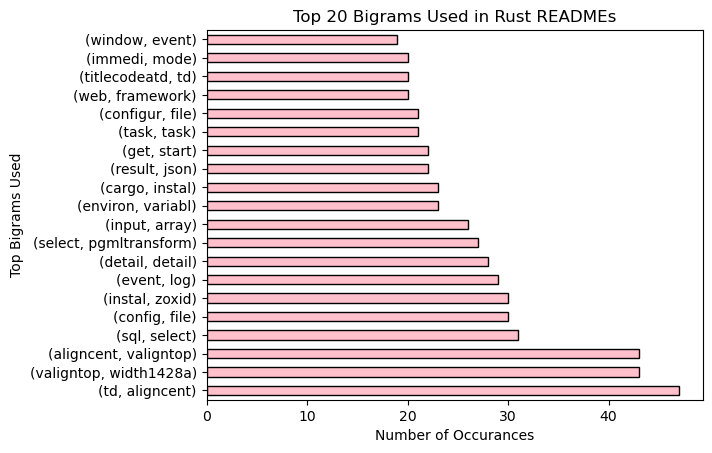

In [16]:
e.viz_rust_bigrams()

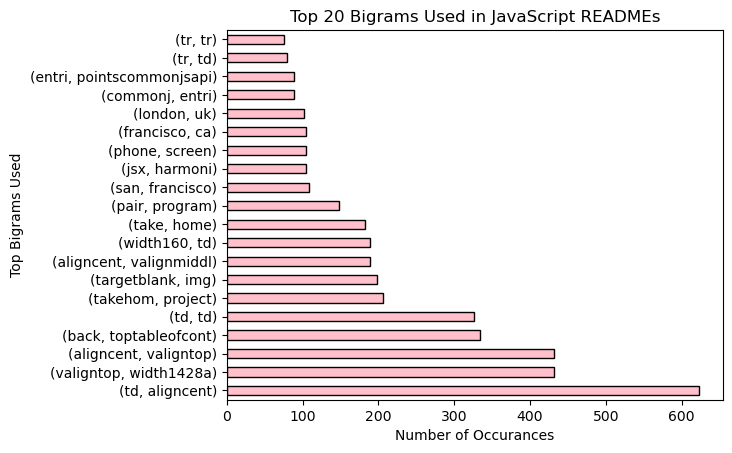

In [17]:
e.viz_java_bigrams()

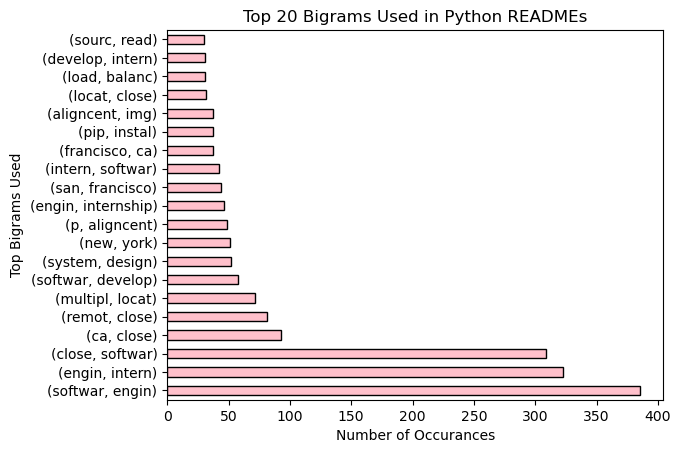

In [18]:
e.viz_python_bigrams()

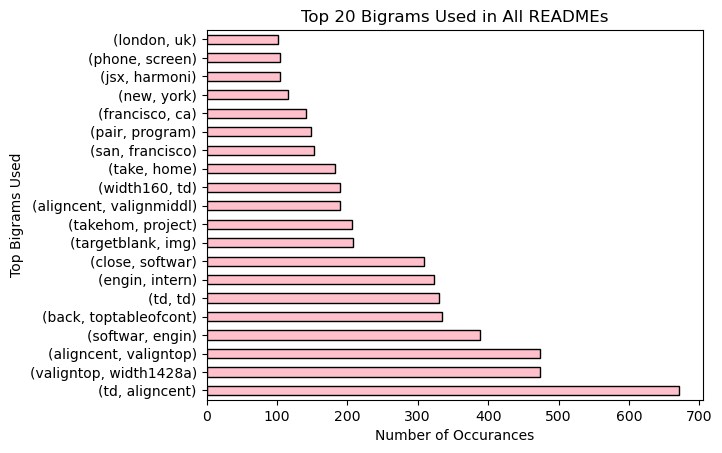

In [19]:
e.viz_all_bigrams()

#### Trigrams

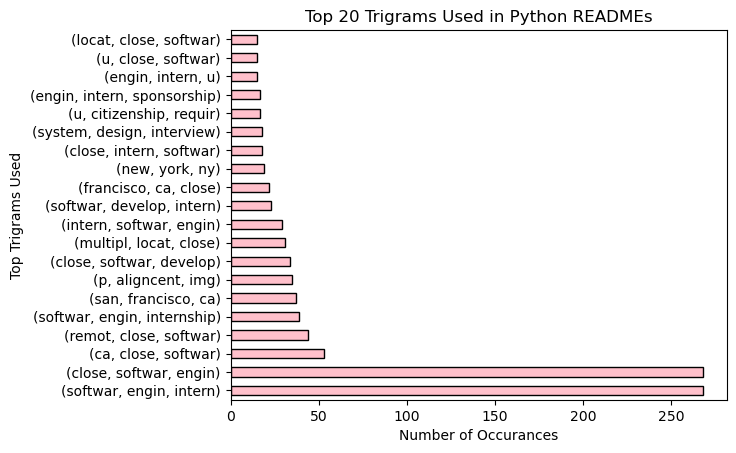

In [20]:
e.viz_python_trigrams()

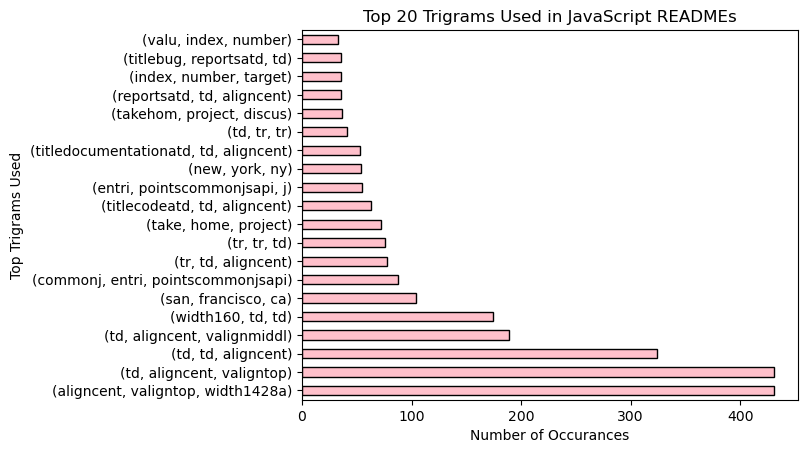

In [21]:
e.viz_java_trigrams()

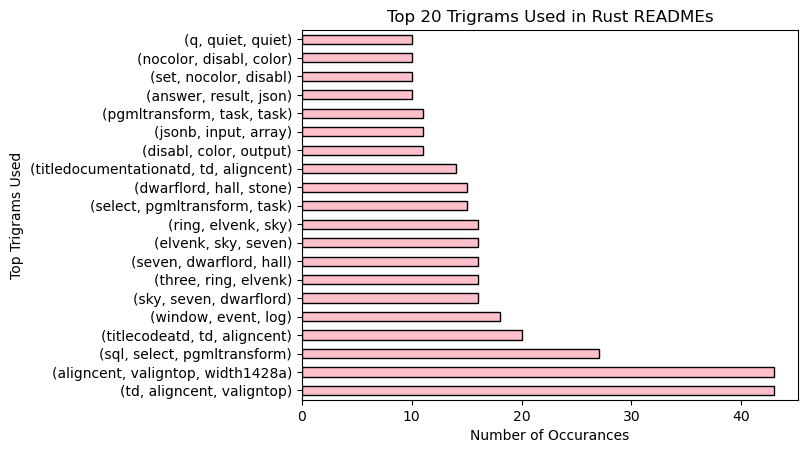

In [22]:
e.viz_rust_trigrams()

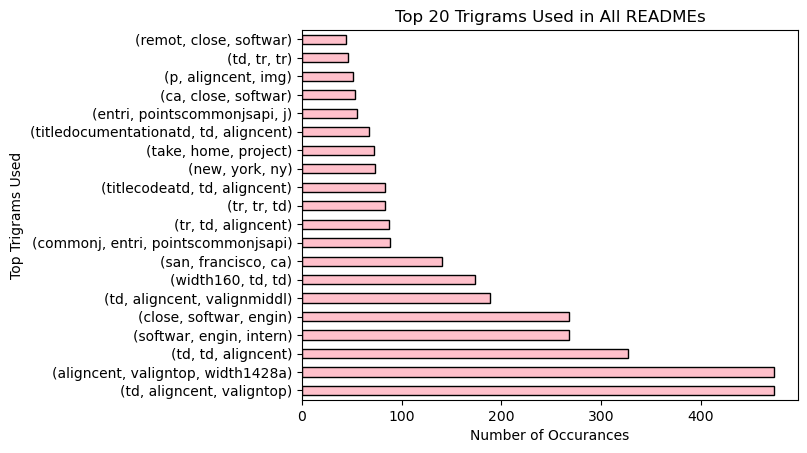

In [23]:
e.viz_all_trigrams()

#### Word Clouds

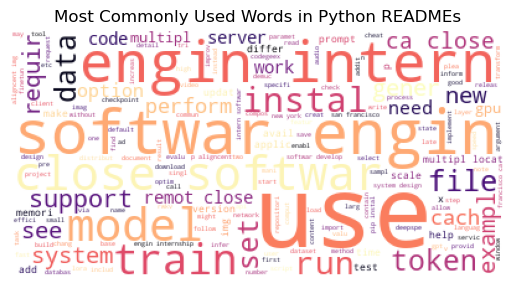

In [24]:
e.viz_python_word_cloud()

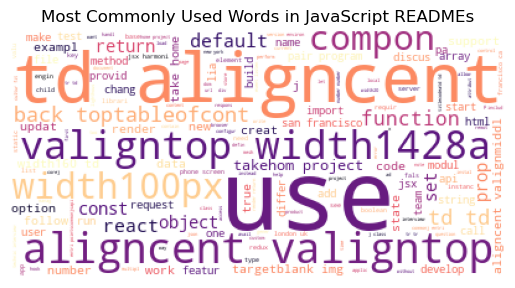

In [25]:
e.viz_java_word_cloud()

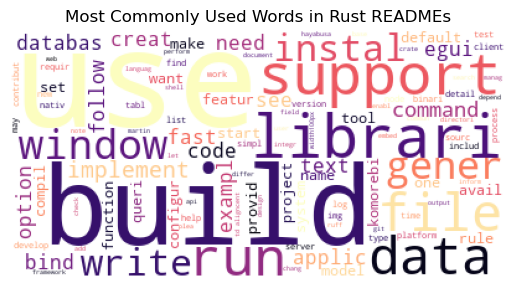

In [26]:
e.viz_rust_word_cloud()

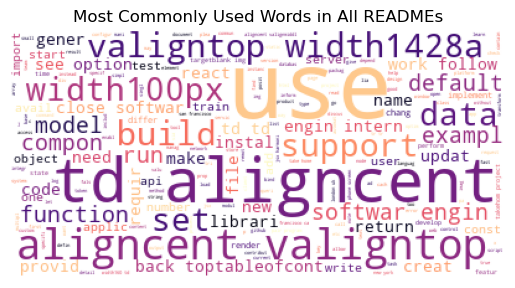

In [27]:
e.viz_all_word_cloud()

#### Sentiment 

In [31]:
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()
train['compound_sentiment'] = train['clean'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [36]:
# Average sentiment among Python READMEs

train[train['language'] == 'Python'].compound_sentiment.mean()

0.77676875

In [37]:
# Average sentiment among JavaScript READMEs

train[train['language'] == 'JavaScript'].compound_sentiment.mean()

0.9661516129032258

In [38]:
# Average sentiment among Rust READMEs

train[train['language'] == 'Rust'].compound_sentiment.mean()

0.9822785714285717

In [39]:
# Average sentiment among all READMEs

train.compound_sentiment.mean()

0.904517582417582

**Takeaway:** Sentiment in the Python READMEs is lower than the other two languages

In [ ]:
# See wrangle.py for function which adds sentiment to train, val, and test

In [40]:
train.head(3)

,repo,language,original,clean,stemmed,lemmatized,compound_sentiment
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,0.9986
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenter h2videoretalking br span style...,div aligncent h2videoretalk br span stylefonts...,div aligncent h2videoretalk br span stylefonts...,0.9692
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,0.9979


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 71 to 42
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   repo                91 non-null     object 
 1   language            91 non-null     object 
 2   original            91 non-null     object 
 3   clean               91 non-null     object 
 4   stemmed             91 non-null     object 
 5   lemmatized          91 non-null     object 
 6   compound_sentiment  91 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.7+ KB


In [112]:
train['word_count'] = train['unclean'].apply(lambda x: len(x.split()))

In [48]:
# See wrangle.py for function which adds word count to train, val, and test

,repo,language,original,clean,stemmed,lemmatized,compound_sentiment,word_count
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,0.9986,1497
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenter h2videoretalking br span style...,div aligncent h2videoretalk br span stylefonts...,div aligncent h2videoretalk br span stylefonts...,0.9692,512
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,0.9979,919
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheats fpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheat fpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheat fpsdemo1httpsuserimagesgith...,-0.9951,430
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1 ...,h1 aligncenterth futur cloud data analyticsh1 ...,0.9977,571


In [113]:
def viz_word_counts(train):

    # plot to visualize actual vs predicted models
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15, 40))
    
    python_count = train[train['language'] == 'Python']
    java_count = train[train['language'] == 'JavaScript']
    rust_count = train[train['language'] == 'Rust']
    
    ax0.hist(python_count.word_count, color='violet', alpha=.5, edgecolor='black')
    ax1.hist(java_count.word_count, color='indigo', alpha=.5, edgecolor='black')
    ax2.hist(rust_count.word_count, color='purple', alpha=.5, edgecolor='black')
    ax3.hist(train.word_count, color='plum', alpha=.5, edgecolor='black')

    ax0.set_xticklabels(ax0.get_xticks(), rotation = 45)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
    ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    ax3.set_xticklabels(ax3.get_xticks(), rotation = 45)

    ax0.set_title("Distribution of Word Counts in Python READMEs")
    ax1.set_title("Distribution of Word Counts in JavaScript READMEs")
    ax2.set_title("Distribution of Word Counts in Rust READMEs")
    ax3.set_title("Distribution of Word Counts in All READMEs")
    plt.show()

/var/folders/gn/krty7k0175z7_1gpw49cwdch0000gn/T/ipykernel_11451/3655029981.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(ax0.get_xticks(), rotation = 45)
/var/folders/gn/krty7k0175z7_1gpw49cwdch0000gn/T/ipykernel_11451/3655029981.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
/var/folders/gn/krty7k0175z7_1gpw49cwdch0000gn/T/ipykernel_11451/3655029981.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
/var/folders/gn/krty7k0175z7_1gpw49cwdch0000gn/T/ipykernel_11451/3655029981.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticks(), rotation = 45)


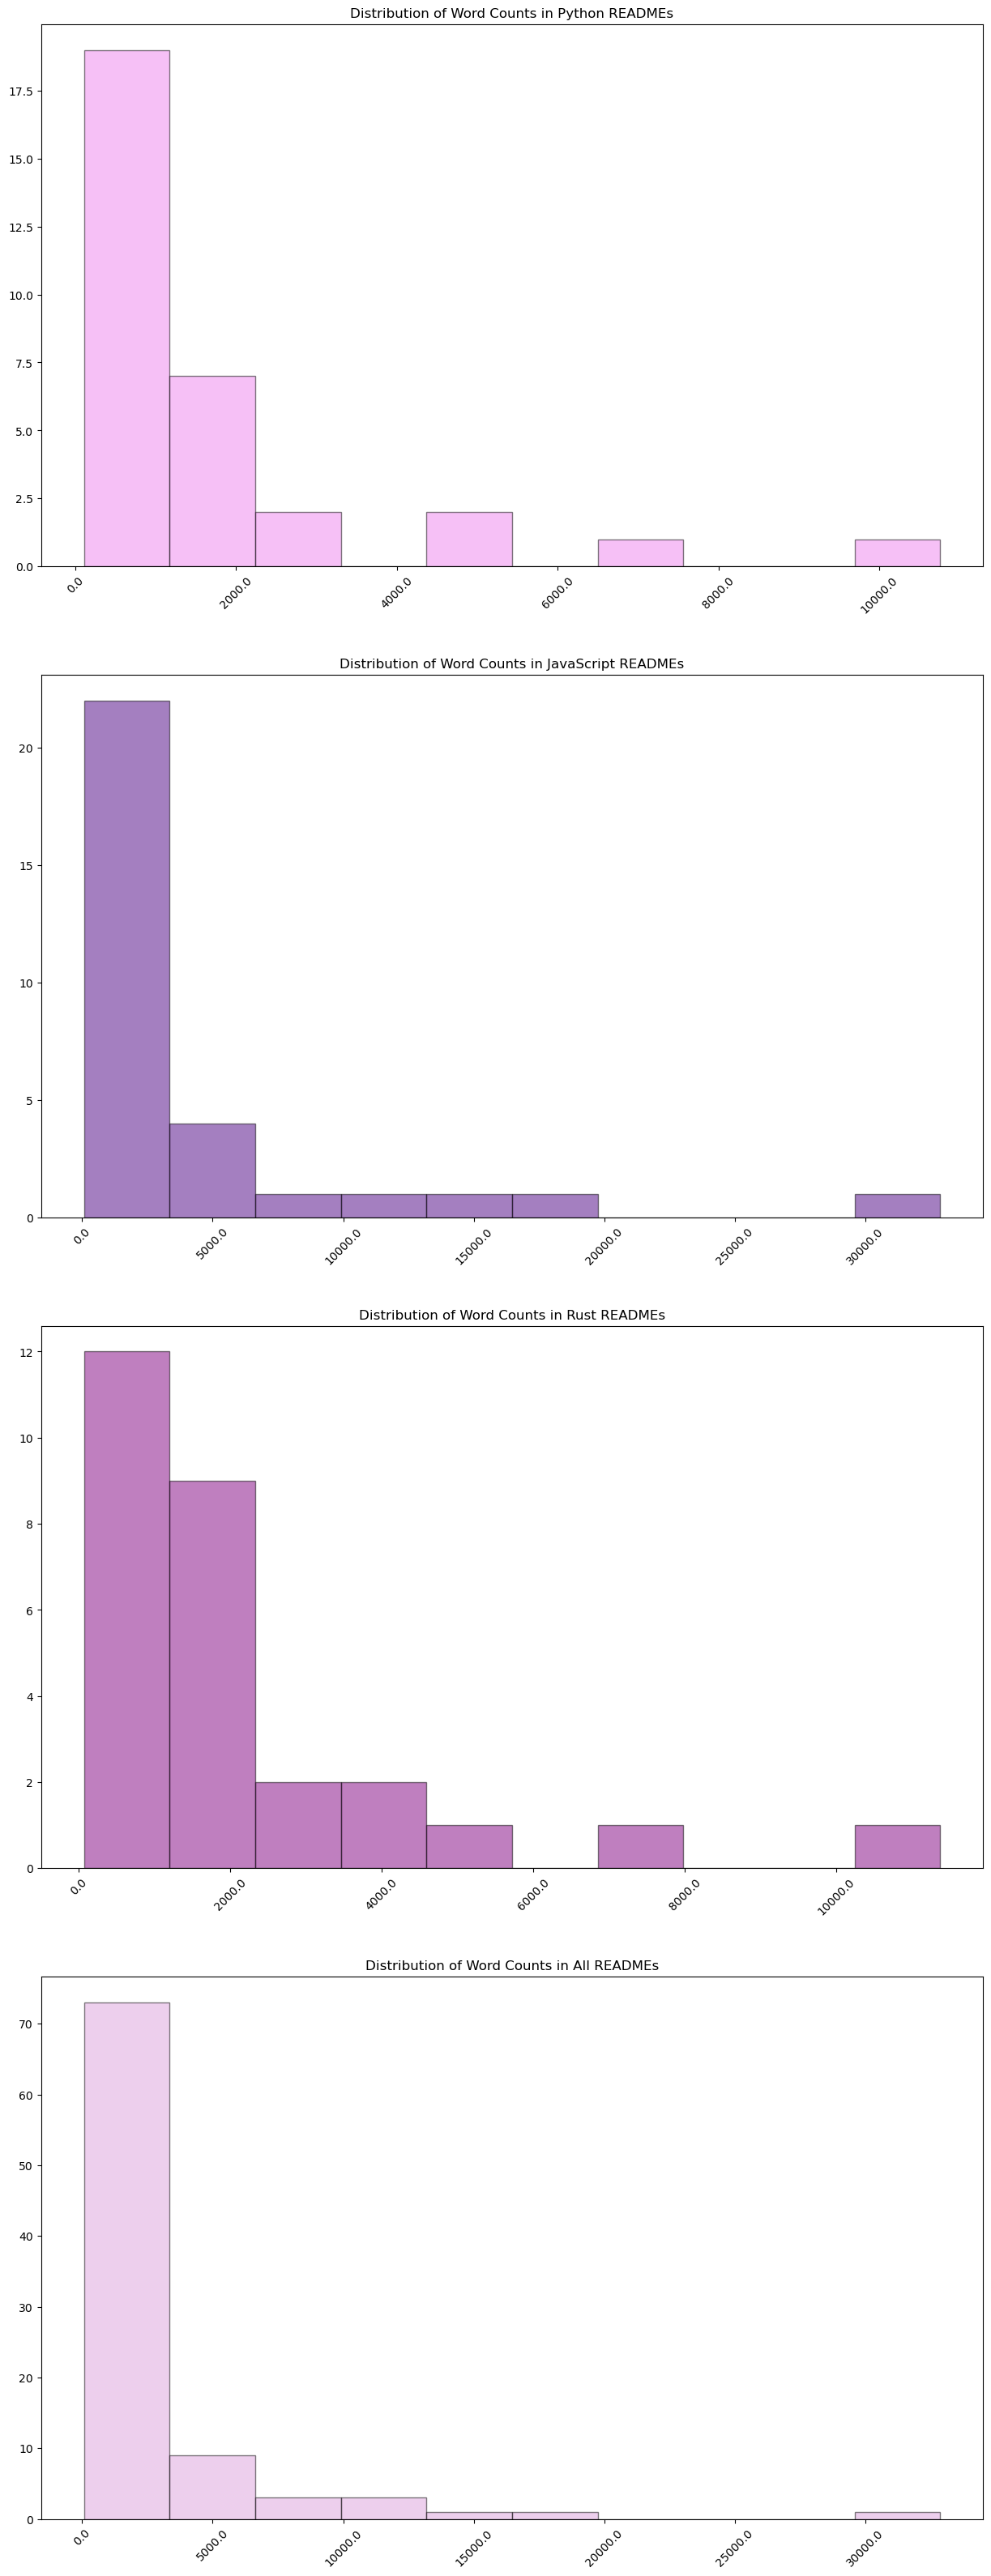

In [114]:
viz_word_counts(train)

In [115]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [106]:
def lower(some_string):
    '''
    The function takes in a string and converts the characters to lowercase.
    Returns the string.
    '''
    some_string = some_string.lower()
    return some_string

def normalize(some_string):
    '''
    The function takes in a string and normalizes, encodes, and decodes it.
    The string then has a regualr expression applied to it which looks for 
    characters that are alphabetical, a number or an apostrophy.
    Returns the string.
    '''
    some_string = unicodedata.normalize('NFKD', some_string).encode('ascii', 'ignore').decode('utf-8')
    some_string = re.sub(r'[^a-zA-Z0-9\'\s]', '', some_string)
    return some_string

def basic_clean(some_string):
    '''
    The function takes a string and applies the lower and the normalize functions
    to it. Returns the string.
    '''
    some_string = lower(some_string)
    some_string = normalize(some_string)
    return some_string

def count_stopwords(some_string):
    from nltk.corpus import stopwords
    stopwords_custom = stopwords.words('english')
    return len(' '.join([word for word in some_string.split() if word in stopwords_custom]))

def get_stopword_ratio(df):
    df['stopword_count'] = (df['original'].apply(basic_clean)).apply(count_stopwords)
    return df

,repo,language,original,clean,stemmed,lemmatized,compound_sentiment,word_count,stopword_count,unclean
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,0.9986,2464,3773,img srcstaticlogocpng width200 height175 altlo...
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenter h2videoretalking br span style...,div aligncent h2videoretalk br span stylefonts...,div aligncent h2videoretalk br span stylefonts...,0.9692,575,558,div aligncenter\n\nh2videoretalking br span st...
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,0.9979,1442,1966,github licensehttpsimgshieldsiogithublicensemi...
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheats fpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheat fpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheat fpsdemo1httpsuserimagesgith...,-0.9951,701,1078,nx60fpsresgfxcheats\n\nfpsdemo1httpsuserimage...
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1 ...,h1 aligncenterth futur cloud data analyticsh1 ...,0.9977,839,963,h1 aligncenterthe future of cloud data analyti...
...,...,...,...,...,...,...,...,...,...,...
136,./OCA/web,JavaScript,\n[![Runboat](https://img.shields.io/badge/run...,runboathttpsimgshieldsiobadgerunboattry20me875...,runboathttpsimgshieldsiobadgerunboattry20me875...,runboathttpsimgshieldsiobadgerunboattry20me875...,0.9601,265,264,\nrunboathttpsimgshieldsiobadgerunboattry20me8...
74,./tikv/tikv,Rust,"<img src=""images/tikv-logo.png"" alt=""tikv_logo...",img srcimagestikvlogopng alttikvlogo width300 ...,img srcimagestikvlogopng alttikvlogo width300 ...,img srcimagestikvlogopng alttikvlogo width300 ...,0.9985,913,1131,img srcimagestikvlogopng alttikvlogo width300\...
106,./OpenBB-finance/OpenBBTerminal,Python,<!-- PROJECT SHIELDS -->\n<!--\n*** I'm using ...,project shields ' using markdown reference sty...,project shield ' use markdown refer style link...,project shield ' use markdown refer style link...,0.9911,709,984,project shields \n\n i'm using markdown refer...
131,./charliermarsh/ruff,Rust,<!-- Begin section: Overview -->\n\n# Ruff\n\n...,begin section overview ruff ruffhttpsimgshield...,begin section overview ruff ruffhttpsimgshield...,begin section overview ruff ruffhttpsimgshield...,0.9977,1299,1312,begin section overview \n\n ruff\n\nruffhttps...
